In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
api_key = os.getenv('newsapi_key')

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
news_api = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = news_api.get_everything(
    q='bitcoin OR btc',
    language='en',
    from_param='2020-02-21',
    sort_by='relevancy'
)
# Total number of articles from 2020-02-21
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}\n")
# Sample article 
print(bitcoin_headlines['articles'][0])

Total articles about Bitcoin: 3761

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'author': 'Romain Dillet', 'title': 'Bitcoin is also having a very, very bad day', 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…', 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/', 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750', 'publishedAt': '2020-03-12T12:34:45Z', 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}


In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = news_api.get_everything(
    q='ethereum OR eth',
    language='en',
    from_param='2020-02-21',
    sort_by='relevancy'
)
# Total number of articles from 2020-02-21
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}\n")
# Sample article
print(ethereum_headlines['articles'][0])

Total articles about Ethereum: 1136

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'author': 'Romain Dillet', 'title': 'Bitcoin is also having a very, very bad day', 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…', 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/', 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750', 'publishedAt': '2020-03-12T12:34:45Z', 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}


In [7]:
# Create the Bitcoin sentiment scores 
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,compound,positive,negative,neutral
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847
1,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000
2,Our robot colleague Satoshi Nakaboto writes ab...,0.2430,0.071,0.052,0.877
3,"For those unfamiliar with the term, a “Bitcoin...",0.3612,0.053,0.000,0.947
4,Our robot colleague Satoshi Nakaboto writes ab...,0.7832,0.135,0.000,0.865


In [8]:
# Create the ethereum sentiment scores 
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,text,compound,positive,negative,neutral
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847
1,If a player picks up an item in an online vide...,0.0000,0.000,0.000,1.000
2,"Coinbase Card, the Visa debit card that lets y...",-0.1027,0.000,0.035,0.965
3,When it comes to celebrities shilling shady in...,0.3182,0.112,0.066,0.822
4,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.323889,0.075263,0.026947,0.897789
std,0.398009,0.032894,0.048352,0.058743
min,-0.526700,0.000000,0.000000,0.730000
25%,0.207750,0.065500,0.000000,0.864000
50%,0.507000,0.068000,0.000000,0.932000
75%,0.507000,0.072500,0.047000,0.932500
max,0.789300,0.137000,0.168000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.265147,0.085421,0.031895,0.882684
std,0.460516,0.070134,0.040662,0.071313
min,-0.659700,0.000000,0.000000,0.762000
25%,0.000000,0.022500,0.000000,0.833500
50%,0.381800,0.072000,0.000000,0.881000
75%,0.597100,0.131500,0.052500,0.930000
max,0.895500,0.208000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH.

Q: Which coin had the highest compound score?

A: ETH.

Q. Which coin had the highest positive score?

A: ETH. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [12]:
# Expand the default stopwords list if necessary
# sw_addon = {}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile('[^a-zA-Z ]')
    
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [14]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = [tokenizer(t) for t in bitcoin_df['text']]
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000,"[launching, two, cryptocurrencyoriented, smart..."
2,Our robot colleague Satoshi Nakaboto writes ab...,0.2430,0.071,0.052,0.877,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,"For those unfamiliar with the term, a “Bitcoin...",0.3612,0.053,0.000,0.947,"[unfamiliar, term, bitcoin, faucet, usually, u..."
4,Our robot colleague Satoshi Nakaboto writes ab...,0.7832,0.135,0.000,0.865,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [15]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = [tokenizer(t) for t in ethereum_df['text']]
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,If a player picks up an item in an online vide...,0.0000,0.000,0.000,1.000,"[player, pick, item, online, video, game, owns..."
2,"Coinbase Card, the Visa debit card that lets y...",-0.1027,0.000,0.035,0.965,"[coinbase, card, visa, debit, card, let, spend..."
3,When it comes to celebrities shilling shady in...,0.3182,0.112,0.066,0.822,"[come, celebrity, shilling, shady, initial, co..."
4,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000,"[launching, two, cryptocurrencyoriented, smart..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate N-grams where N=2
def bigram_counter(text):
    
    big_string = ''.join(text)
    tokens = tokenizer(big_string)
    bigrams = ngrams(tokens, n=2)
    
    return Counter(bigrams).most_common(10)

In [18]:
# Generate Bitcoin N-grams
bigram_counter(bitcoin_df['text'])

[(('satoshi', 'nakaboto'), 28),
 (('bitcoin', 'btc'), 15),
 (('charsour', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('btc', 'every'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'daywelcome'), 14)]

In [19]:
# Generate the Ethereum N-grams where N=2
bigram_counter(ethereum_df['text'])

[(('fell', 'first'), 3),
 (('first', 'time'), 3),
 (('htc', 'exodus'), 2),
 (('g', 'hub'), 2),
 (('charsreutersbitcoin', 'tanked'), 2),
 (('tanked', 'thursday'), 2),
 (('thursday', 'fell'), 2),
 (('time', 'since'), 2),
 (('since', 'may'), 2),
 (('may', 'amid'), 2)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
bitcoin_tokens = []

for row in bitcoin_df['tokens']:
    for token in row:
        bitcoin_tokens.append(token)
        
token_count(bitcoin_tokens)

[('bitcoin', 46),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 19),
 ('btc', 18),
 ('going', 16),
 ('hour', 15),
 ('used', 15),
 ('robot', 14),
 ('colleague', 14)]

In [22]:
# Get the top 10 words for Ethereum
ethereum_tokens = []

for row in ethereum_df['tokens']:
    for token in row:
        ethereum_tokens.append(token)
        
token_count(ethereum_tokens)

[('char', 19),
 ('cryptocurrency', 7),
 ('coinbase', 6),
 ('new', 6),
 ('company', 5),
 ('first', 5),
 ('fell', 5),
 ('bitcoin', 4),
 ('htc', 4),
 ('g', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

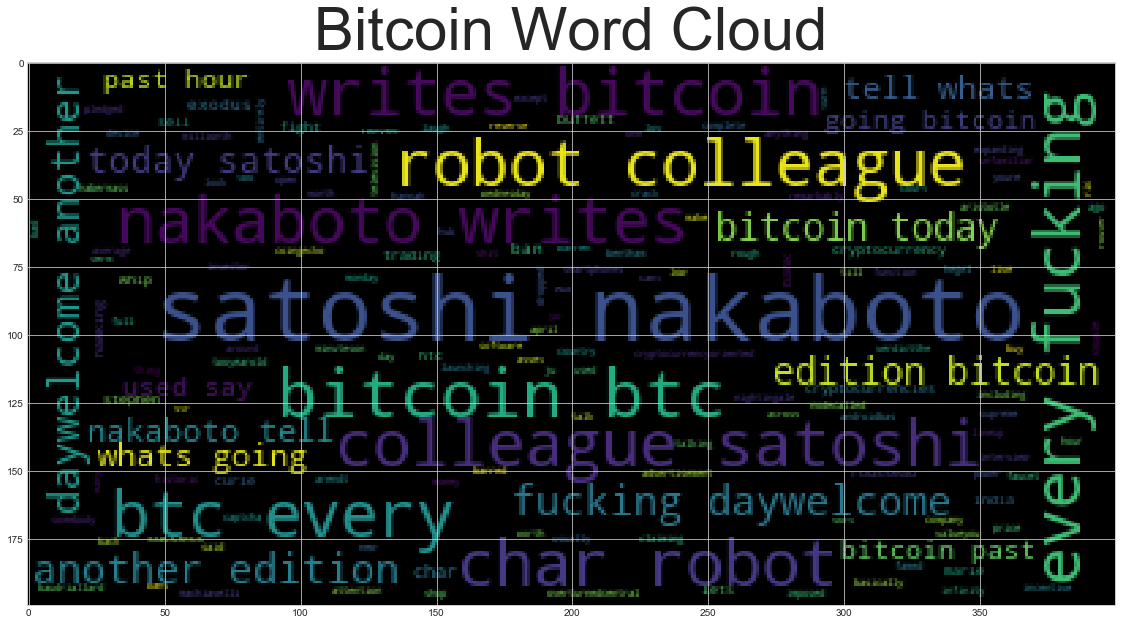

In [24]:
# Generate the Bitcoin word cloud
wc_data_btc = ','.join(bitcoin_tokens)
wc_btc = WordCloud().generate(wc_data_btc)
plt.title('Bitcoin Word Cloud', fontsize=60)
plt.imshow(wc_btc)

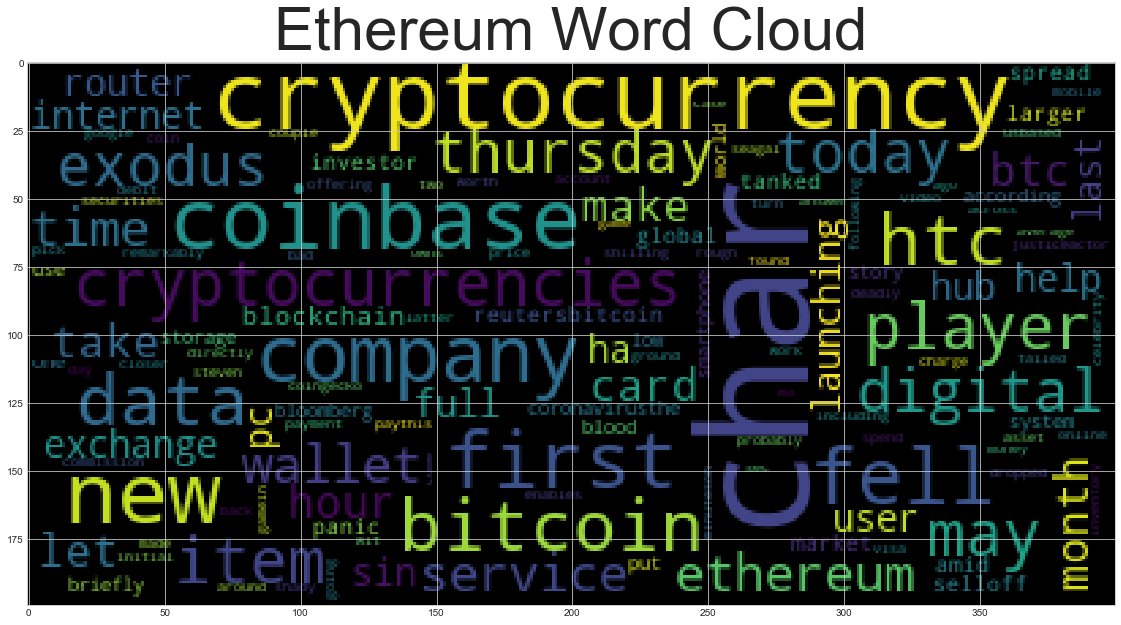

In [25]:
# Generate the Ethereum word cloud
wc_data_eth = ','.join(ethereum_tokens)
wc_eth = WordCloud().generate(wc_data_eth)
plt.title('Ethereum Word Cloud', fontsize=60)
plt.imshow(wc_eth)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
bitcoin_string = ''
for row in bitcoin_df['text']:
    bitcoin_string = bitcoin_string + row
    
bitcoin_string[:3000]

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As Bentham used to say: Fight the power!\r… [+3163 chars]For those unfamiliar with the term, a “Bitcoin Faucet” is usually used as an incentive in software that wants your attention. Complete a captcha or look at and adverti

In [30]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_string)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Bentham PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Rousseau PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hannah Arendt PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Marie Curie PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Stephen Hawking PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi

---

## Ethereum NER

In [33]:
# Concatenate all of the bitcoin text together
ethereum_string = ''
for row in ethereum_df['text']:
    ethereum_string = ethereum_string + row
    
ethereum_string[:3000]

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars]Coinbase Card, the Visa debit card that lets you spend cryptocurrency directly from your Coinbase account, now works with Google Pay.\xa0\r\nThis makes Coinbase, a U.S.-based cryptocurrency exchange, the first company that enables users to make mobile payments wit… [+1000 chars]When it comes to celebrities shilling shady initial coin offerings for money, the Securities and Exchange Commission is out for justice.\xa0\r\nActor Steven Seagal foun

In [34]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_string)
# Add a title to the document
ethereum_ner.user_data['title'] = 'Ethereum NER'

In [35]:
# Render the visualization
displacy.render(ethereum_ner, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
Visa ORG
Google Pay ORG
Coinbase PRODUCT
first ORDINAL
the Securities and Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
South Korean NORP
today DATE
chars]Hundreds of thousands CARDINAL
Homea ORG
1,200% PERCENT
this past week DATE
2020 CARDINAL
DApps &amp ORG
DLT ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
chars]7 ORG
7 CARDINAL
one-day DATE
months DATE
Bitcoin GPE
21 percent PERCENT
the last 24 hours TIME
Earlier today TIME
Bitcoin GPE
6,000 MONEY
first ORDINAL
+1838 chars]Some Libra Association ORG
Andreessen Horowitz PERSON
today DATE
50 CARDINAL
The Celo Foundation ORG
‘